# This code is to analysis the data of all the csv files generated by the gurobi model.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams

In [2]:
cur_dir = os.getcwd()
print(cur_dir)

parent_dir = os.path.dirname(cur_dir)
print(parent_dir)

data_dir = os.path.join(parent_dir, 'result_data')
print(data_dir)

/Users/dtjgp/Projects/GreenAI/SolarPanelData_revise/Code
/Users/dtjgp/Projects/GreenAI/SolarPanelData_revise
/Users/dtjgp/Projects/GreenAI/SolarPanelData_revise/result_data


In [3]:
data_files = os.listdir(data_dir)
print(data_files)

['Duration18_start_hour12_wdc300.csv', 'Duration22_start_hour20_wdc100.csv', 'Duration14_start_hour12_wdc1000.csv', 'Duration21_start_hour0_wdc800.csv', 'Duration27_start_hour4_wdc400.csv', 'Duration25_start_hour4_wdc700.csv', 'Duration21_start_hour4_wdc100.csv', 'Duration23_start_hour4_wdc200.csv', 'Duration25_start_hour12_wdc400.csv', 'Duration23_start_hour12_wdc1000.csv', 'Duration17_start_hour20_wdc700.csv', 'Duration27_start_hour20_wdc1000.csv', 'Duration26_start_hour12_wdc300.csv', 'Duration15_start_hour0_wdc900.csv', 'Duration17_start_hour4_wdc300.csv', 'Duration21_start_hour20_wdc600.csv', 'Duration27_start_hour20_wdc800.csv', 'Duration20_start_hour16_wdc400.csv', 'Duration28_start_hour16_wdc500.csv', 'Duration15_start_hour16_wdc200.csv', 'Duration25_start_hour8_wdc800.csv', 'Duration19_start_hour4_wdc500.csv', 'Duration16_start_hour16_wdc500.csv', 'Duration19_start_hour20_wdc800.csv', 'Duration23_start_hour16_wdc300.csv', 'Duration20_start_hour8_wdc900.csv', 'Duration16_start_

In [4]:
data_dict = {}
for file in data_files:
    
    duration = file.split('_')[0][-2:]
    start_hour = file.split('_')[2][4:]
    pv_type = file.split('_')[-1][3:]
    pv_type = pv_type.split('.')[0]
    # print(duration, start_hour, pv_type)
    key = f'd{duration}_s{start_hour}_p{pv_type}'
    # print(key)
    df = pd.read_csv(os.path.join(data_dir, file))
    grid_gen = df['G_grid'].sum()
    solar_gen = df['G_solar'].sum()
    minimum_cost = float(df['minimum_cost'][0][1:])
    data_dict[key] = [grid_gen, solar_gen, minimum_cost]


Data for duration=19, start_hour=20, pv_type=1000:
Grid generation: 2431.71
Solar generation: 386.01
Minimum cost: $0.72
GPU Power Levels:
0     140.0
1     150.0
2     150.0
3     150.0
4     180.0
5     140.0
6     180.0
7     170.0
8     180.0
9     150.0
10    180.0
11    120.0
12    100.0
13    120.0
14    190.0
15    100.0
16    130.0
17    100.0
18    130.0
Name: GPU_power, dtype: float64


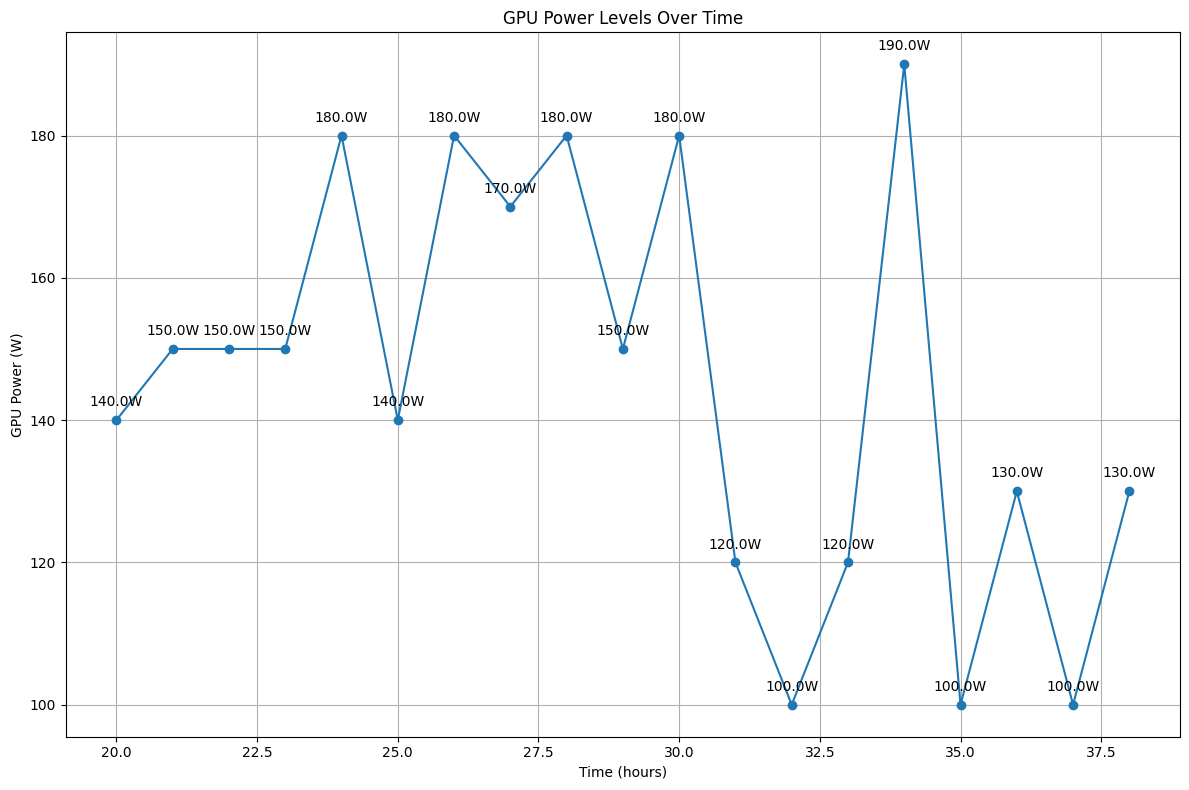

In [5]:
# Find data for duration=19, start_hour=20, pv_type=1000
key = 'd19_s20_p1000'
if key in data_dict:
    print(f"Data for duration=19, start_hour=20, pv_type=1000:")
    print(f"Grid generation: {data_dict[key][0]:.2f}")
    print(f"Solar generation: {data_dict[key][1]:.2f}") 
    print(f"Minimum cost: ${data_dict[key][2]:.2f}")
else:
    print("No data found for the specified parameters")

# Read the file for duration=19, start_hour=20, pv_type=1000
df = pd.read_csv(os.path.join(data_dir, 'Duration19_start_hour20_wdc1000.csv'))

# Print unique GPU power levels and their counts
print("GPU Power Levels:")
gpu_power= df['GPU_power']
print(gpu_power) 

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Plot GPU power levels over time
plt.plot(df['time'], df['GPU_power'], marker='o')

# Customize the plot
plt.title('GPU Power Levels Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('GPU Power (W)')
plt.grid(True)

# Add text annotations for each point
for i, power in enumerate(df['GPU_power']):
    plt.annotate(f'{power}W', 
                (df['time'][i], power),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.tight_layout()
plt.show()



In [6]:
duration = np.arange(14,29)
start_hour = np.arange(0,24,4)
pv_type = np.arange(100,1001,100)
print(duration, start_hour, pv_type)

[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] [ 0  4  8 12 16 20] [ 100  200  300  400  500  600  700  800  900 1000]


### analysis the influence of the duration

In [7]:
# filter data_dict to get entries with start hour 12 and panel size 900
filtered_dict_00900 = {k: v for k, v in data_dict.items() if '_s0_p900' in k}
filtered_dict_04900 = {k: v for k, v in data_dict.items() if '_s4_p900' in k}
filtered_dict_08900 = {k: v for k, v in data_dict.items() if '_s8_p900' in k}
filtered_dict_12900 = {k: v for k, v in data_dict.items() if '_s12_p900' in k}
filtered_dict_16900 = {k: v for k, v in data_dict.items() if '_s16_p900' in k}
filtered_dict_20900 = {k: v for k, v in data_dict.items() if '_s20_p900' in k}
# sort the filtered dict by duration
sorted_dict_00900 = dict(sorted(filtered_dict_00900.items()))
sorted_dict_04900 = dict(sorted(filtered_dict_04900.items()))
sorted_dict_08900 = dict(sorted(filtered_dict_08900.items()))
sorted_dict_12900 = dict(sorted(filtered_dict_12900.items()))
sorted_dict_16900 = dict(sorted(filtered_dict_16900.items()))
sorted_dict_20900 = dict(sorted(filtered_dict_20900.items()))
# print(sorted_dict_00900)

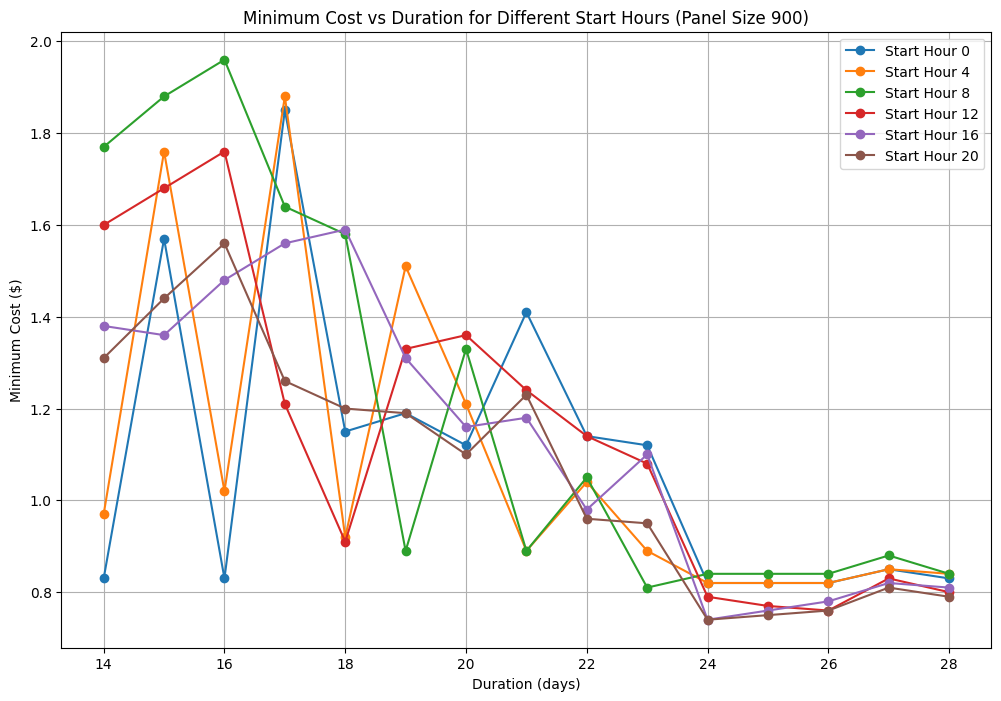

In [8]:
plt.figure(figsize=(12, 8))

# Plot each start hour dictionary
filtered_dicts = [filtered_dict_00900, filtered_dict_04900, filtered_dict_08900, 
                 filtered_dict_12900, filtered_dict_16900, filtered_dict_20900]

for filtered_dict in filtered_dicts:
    costs = []
    durations = []
    
    # Convert dictionary items to list and sort by duration
    sorted_items = sorted(filtered_dict.items(), 
                         key=lambda x: int(x[0].split('_')[0][1:]))  # sort by duration number
    
    for key, value in sorted_items:
        dur = int(key.split('_')[0][1:])  # Extract duration from key
        durations.append(dur)
        costs.append(value[2])  # Get minimum cost
    
    # Get start hour for legend
    start_hour = list(filtered_dict.keys())[0].split('_')[1][1:]
    plt.plot(durations, costs, marker='o', label=f'Start Hour {start_hour}')

plt.xlabel('Duration (days)')
plt.ylabel('Minimum Cost ($)')
plt.title('Minimum Cost vs Duration for Different Start Hours (Panel Size 900)')
plt.legend()
plt.grid(True)
plt.show()

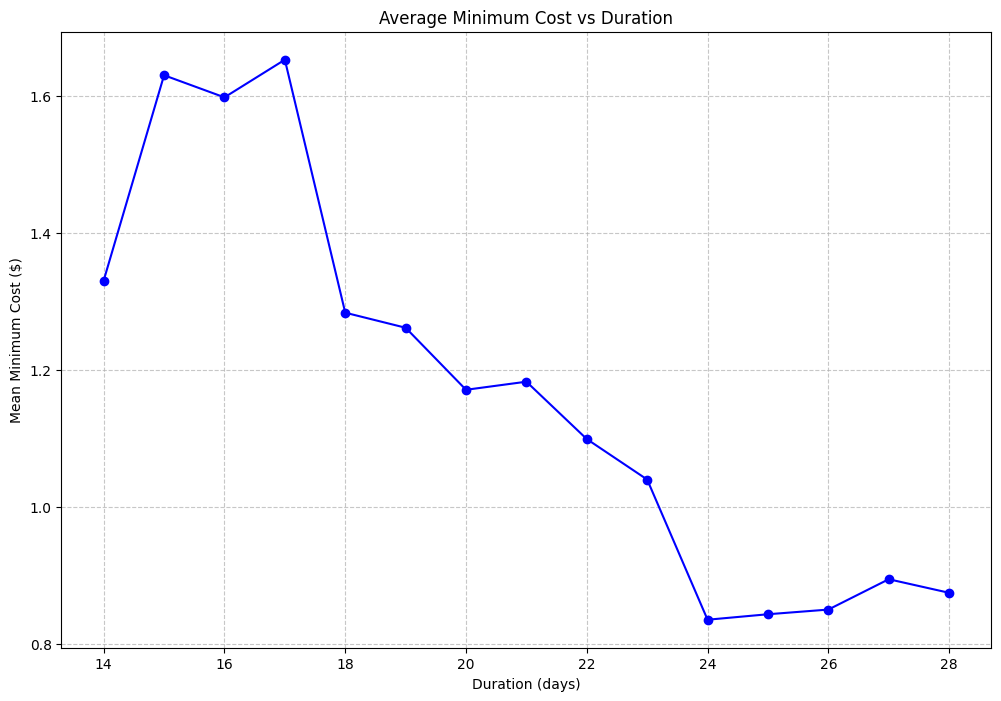

In [9]:
# Create a dictionary to store all costs for each duration
duration_costs = {}

# Iterate through data_dict to group costs by duration
for key, value in data_dict.items():
    duration = int(key.split('_')[0][1:])  # Extract duration from key
    if duration not in duration_costs:
        duration_costs[duration] = []
    duration_costs[duration].append(value[2])  # value[2] is the minimum cost

# Calculate mean cost for each duration
mean_costs = {}
for duration, costs in duration_costs.items():
    mean_costs[duration] = np.mean(costs)

# Create lists for plotting
durations = sorted(mean_costs.keys())
mean_cost_values = [mean_costs[d] for d in durations]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(durations, mean_cost_values, 'b-o')
plt.xlabel('Duration (days)')
plt.ylabel('Mean Minimum Cost ($)')
plt.title('Average Minimum Cost vs Duration')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

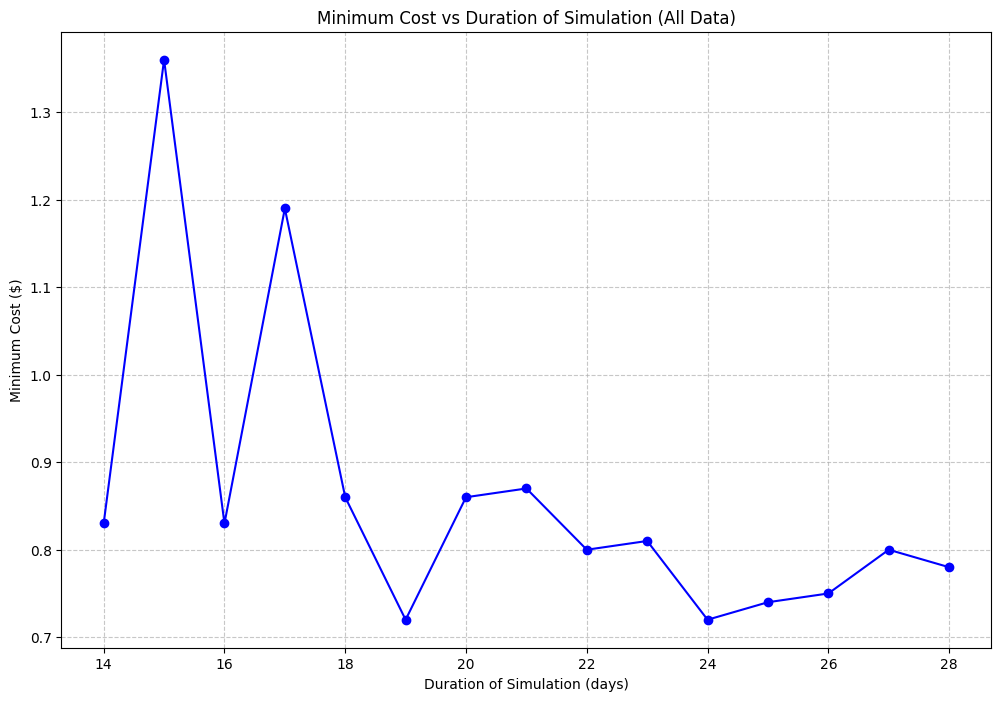

In [10]:
# Get minimum cost for each duration from all data
duration = np.arange(14, 29)  # range of duration values
minimum_cost_all = []

for d in duration:
    # Filter data for each duration
    costs = [v[2] for k, v in data_dict.items() if f'd{d}_' in k]
    # Get the minimum cost for this duration
    min_cost = min(costs)
    minimum_cost_all.append(min_cost)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(duration, minimum_cost_all, 'b-o')
plt.xlabel('Duration of Simulation (days)')
plt.ylabel('Minimum Cost ($)')
plt.title('Minimum Cost vs Duration of Simulation (All Data)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### analysis the influence of the start time

In [11]:
# filter data_dict to get entries with duration 19 and panel size 900
filtered_dict_d14900 = {k: v for k, v in data_dict.items() if 'd14' in k and 'p900' in k}
filtered_dict_d15900 = {k: v for k, v in data_dict.items() if 'd15' in k and 'p900' in k}
filtered_dict_d16900 = {k: v for k, v in data_dict.items() if 'd16' in k and 'p900' in k}
filtered_dict_d17900 = {k: v for k, v in data_dict.items() if 'd17' in k and 'p900' in k}
filtered_dict_d18900 = {k: v for k, v in data_dict.items() if 'd18' in k and 'p900' in k}
filtered_dict_d19900 = {k: v for k, v in data_dict.items() if 'd19' in k and 'p900' in k}
filtered_dict_d20900 = {k: v for k, v in data_dict.items() if 'd20' in k and 'p900' in k}
filtered_dict_d21900 = {k: v for k, v in data_dict.items() if 'd21' in k and 'p900' in k}
filtered_dict_d22900 = {k: v for k, v in data_dict.items() if 'd22' in k and 'p900' in k}
filtered_dict_d23900 = {k: v for k, v in data_dict.items() if 'd23' in k and 'p900' in k}
filtered_dict_d24900 = {k: v for k, v in data_dict.items() if 'd24' in k and 'p900' in k}
filtered_dict_d25900 = {k: v for k, v in data_dict.items() if 'd25' in k and 'p900' in k}
filtered_dict_d26900 = {k: v for k, v in data_dict.items() if 'd26' in k and 'p900' in k}
filtered_dict_d27900 = {k: v for k, v in data_dict.items() if 'd27' in k and 'p900' in k}
filtered_dict_d28900 = {k: v for k, v in data_dict.items() if 'd28' in k and 'p900' in k}

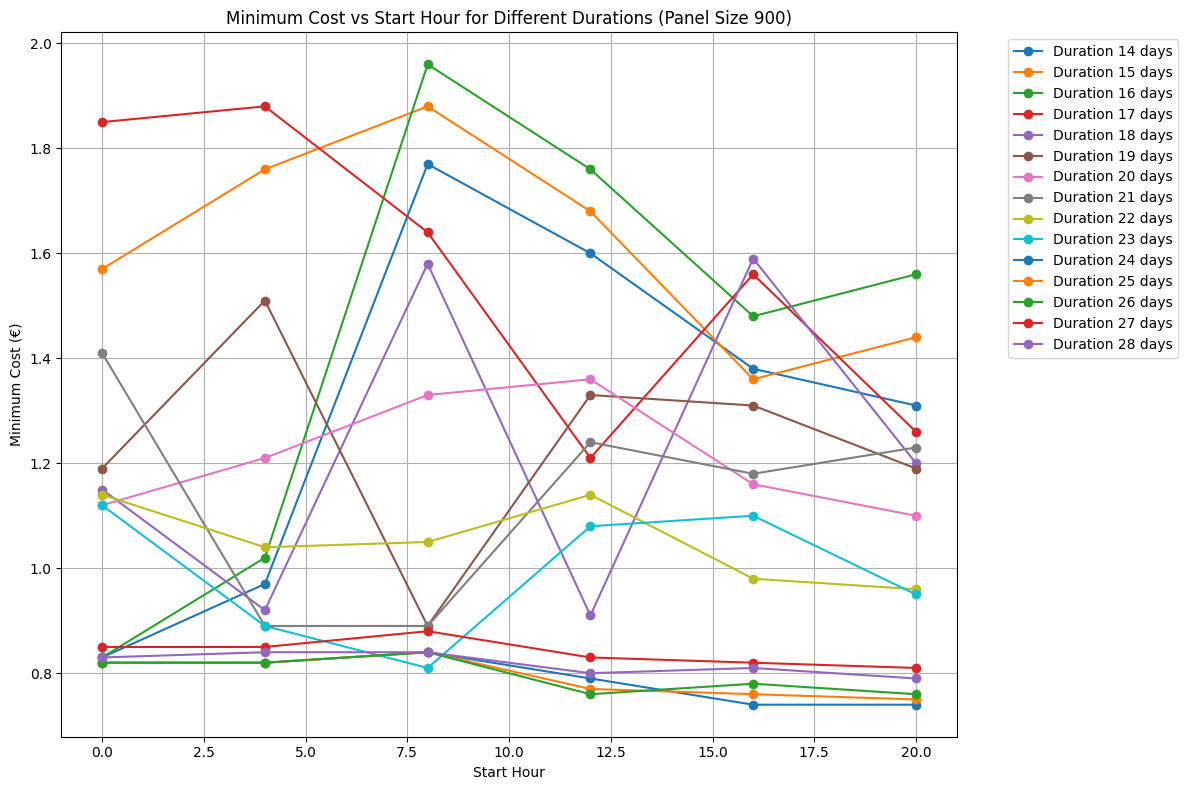

In [12]:
plt.figure(figsize=(12, 8))

# Plot each duration dictionary
filtered_dicts = [filtered_dict_d14900, filtered_dict_d15900, filtered_dict_d16900,
                  filtered_dict_d17900, filtered_dict_d18900, filtered_dict_d19900,
                  filtered_dict_d20900, filtered_dict_d21900, filtered_dict_d22900,
                  filtered_dict_d23900, filtered_dict_d24900, filtered_dict_d25900,
                  filtered_dict_d26900, filtered_dict_d27900, filtered_dict_d28900]

for filtered_dict in filtered_dicts:
    costs = []
    starthour = []
    
    # Convert dictionary items to list and sort by start hour
    sorted_items = sorted(filtered_dict.items(), 
                         key=lambda x: int(x[0].split('_')[1][1:]))  # sort by start hour
    
    for key, value in sorted_items:
        sh = int(key.split('_')[1][1:])  # Extract start hour from key
        starthour.append(sh)
        costs.append(value[2])  # Get minimum cost
    
    # Get duration for legend
    duration = list(filtered_dict.keys())[0].split('_')[0][1:]
    plt.plot(starthour, costs, marker='o', label=f'Duration {duration} days')

plt.xlabel('Start Hour')
plt.ylabel('Minimum Cost (€)')
plt.title('Minimum Cost vs Start Hour for Different Durations (Panel Size 900)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

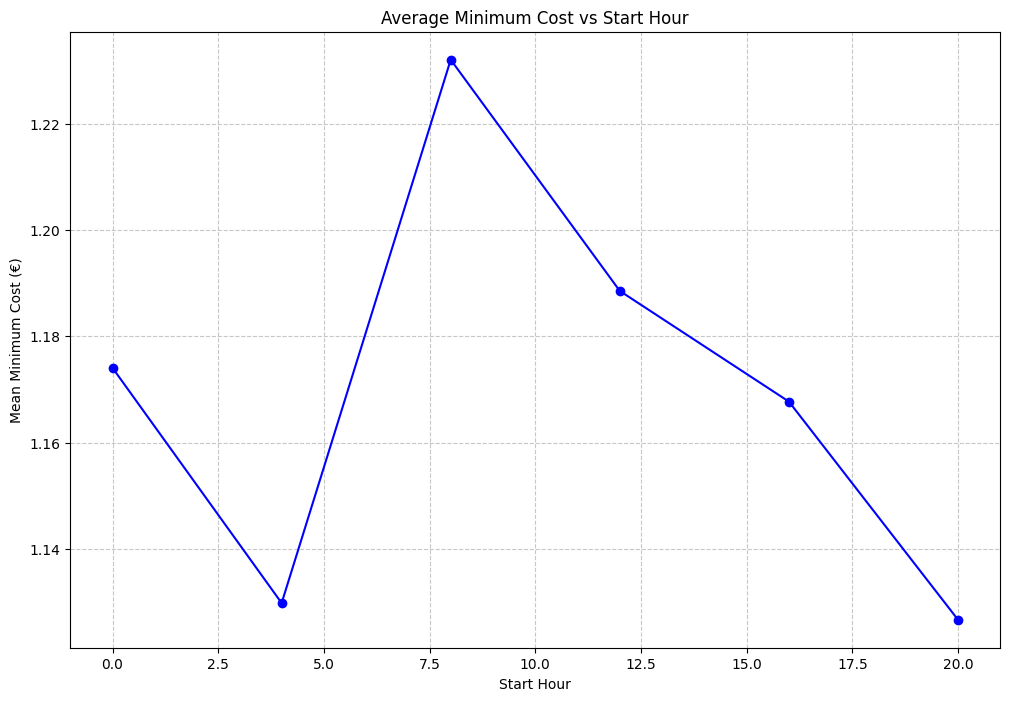

In [13]:
# Create a dictionary to store all costs for each start hour
start_hour_costs = {}

# Iterate through data_dict to group costs by start hour
for key, value in data_dict.items():
    start_hour = int(key.split('_')[1][1:])  # Extract start hour from key
    if start_hour not in start_hour_costs:
        start_hour_costs[start_hour] = []
    start_hour_costs[start_hour].append(value[2])  # value[2] is the minimum cost

# Calculate mean cost for each start hour
mean_costs = {}
for sh, costs in start_hour_costs.items():
    mean_costs[sh] = np.mean(costs)

# Create lists for plotting
start_hours = sorted(mean_costs.keys())
mean_cost_values = [mean_costs[sh] for sh in start_hours]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(start_hours, mean_cost_values, 'b-o')
plt.xlabel('Start Hour')
plt.ylabel('Mean Minimum Cost (€)')
plt.title('Average Minimum Cost vs Start Hour')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

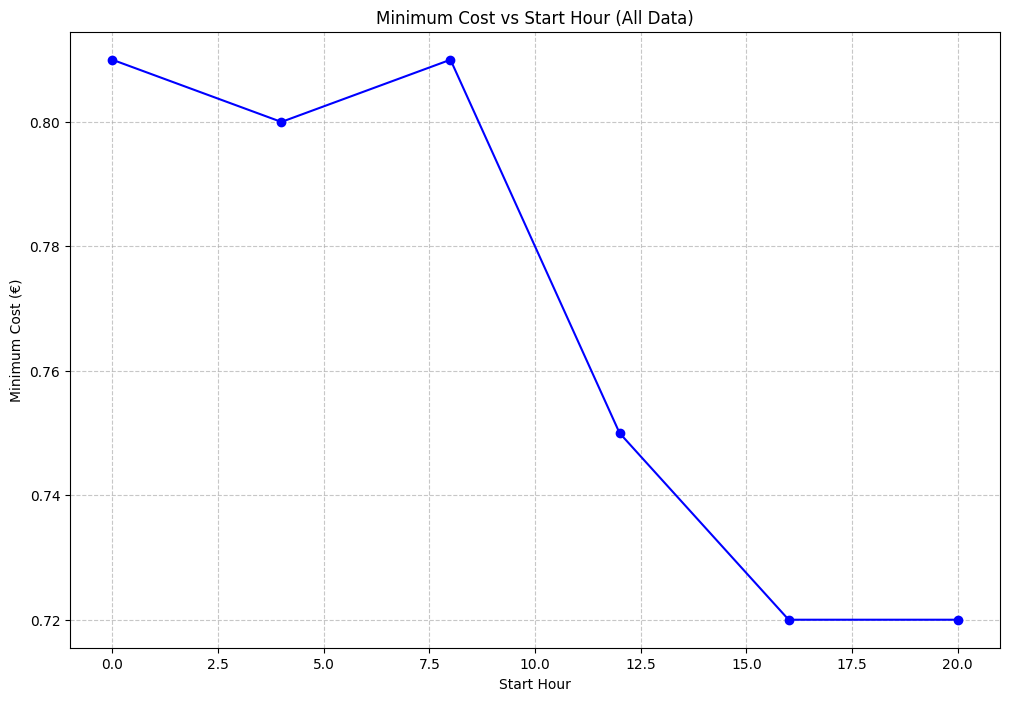

In [14]:
# Get minimum cost for each start hour from all data
start_hour = np.arange(0, 24, 4)  # range of start hour values
minimum_cost_all = []

for sh in start_hour:
    # Filter data for each start hour
    costs = [v[2] for k, v in data_dict.items() if f's{sh}_' in k]
    # Get the minimum cost for this start hour
    min_cost = min(costs)
    minimum_cost_all.append(min_cost)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(start_hour, minimum_cost_all, 'b-o')
plt.xlabel('Start Hour')
plt.ylabel('Minimum Cost (€)')
plt.title('Minimum Cost vs Start Hour (All Data)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### analysis the influence of the panel size

In [15]:
# filter data_dict to get entries with duration 19 and start hour 20
filtered_dict_d19s0 = {k: v for k, v in data_dict.items() if 'd19_s0' in k}
filtered_dict_d19s4 = {k: v for k, v in data_dict.items() if 'd19_s4' in k}
filtered_dict_d19s8 = {k: v for k, v in data_dict.items() if 'd19_s8' in k}
filtered_dict_d19s12 = {k: v for k, v in data_dict.items() if 'd19_s12' in k}
filtered_dict_d19s16 = {k: v for k, v in data_dict.items() if 'd19_s16' in k}
filtered_dict_d19s20 = {k: v for k, v in data_dict.items() if 'd19_s20' in k}

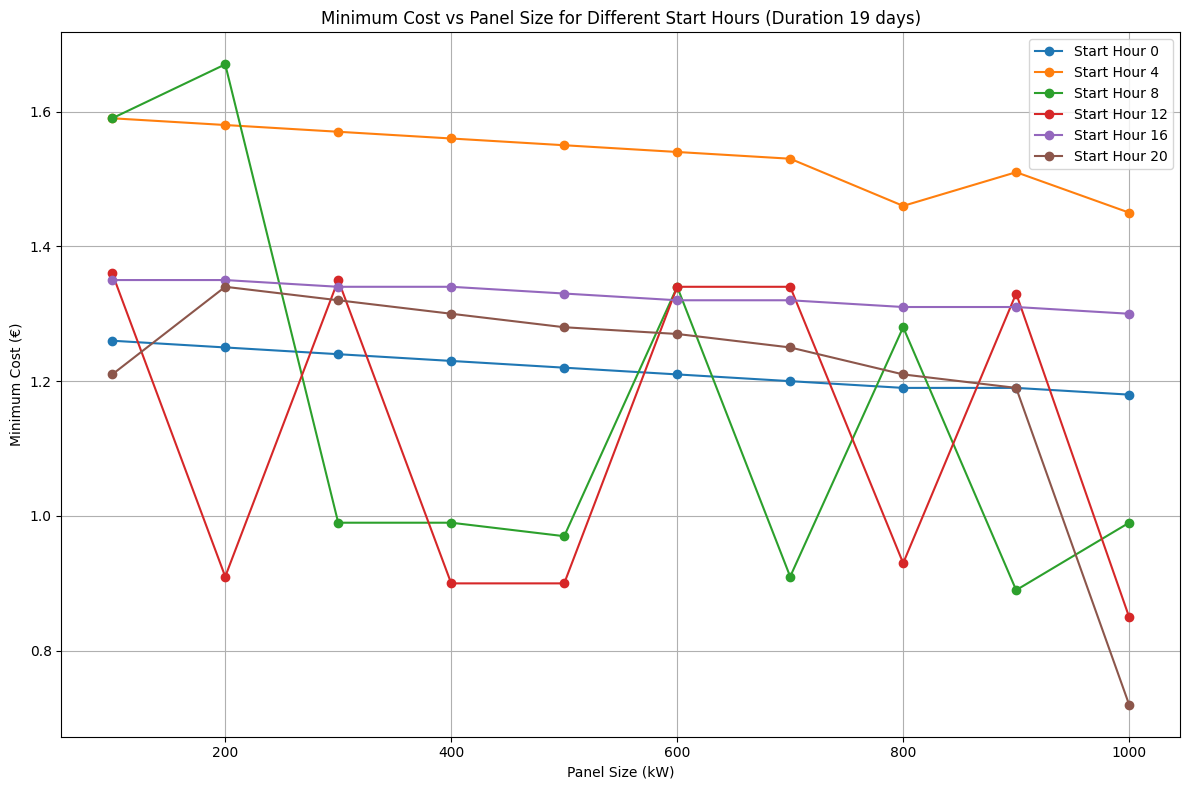

In [16]:
plt.figure(figsize=(12, 8))

# Plot each start hour dictionary
filtered_dicts = [filtered_dict_d19s0, filtered_dict_d19s4, filtered_dict_d19s8,
                  filtered_dict_d19s12, filtered_dict_d19s16, filtered_dict_d19s20]

for filtered_dict in filtered_dicts:
    costs = []
    panel_sizes = []
    
    # Convert dictionary items to list and sort by panel size
    sorted_items = sorted(filtered_dict.items(), 
                         key=lambda x: int(x[0].split('_')[2][1:]))  # sort by panel size
    
    for key, value in sorted_items:
        size = int(key.split('_')[2][1:])  # Extract panel size from key
        panel_sizes.append(size)
        costs.append(value[2])  # Get minimum cost
    
    # Get start hour for legend
    start_hour = list(filtered_dict.keys())[0].split('_')[1][1:]
    plt.plot(panel_sizes, costs, marker='o', label=f'Start Hour {start_hour}')

plt.xlabel('Panel Size (kW)')
plt.ylabel('Minimum Cost (€)')
plt.title('Minimum Cost vs Panel Size for Different Start Hours (Duration 19 days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

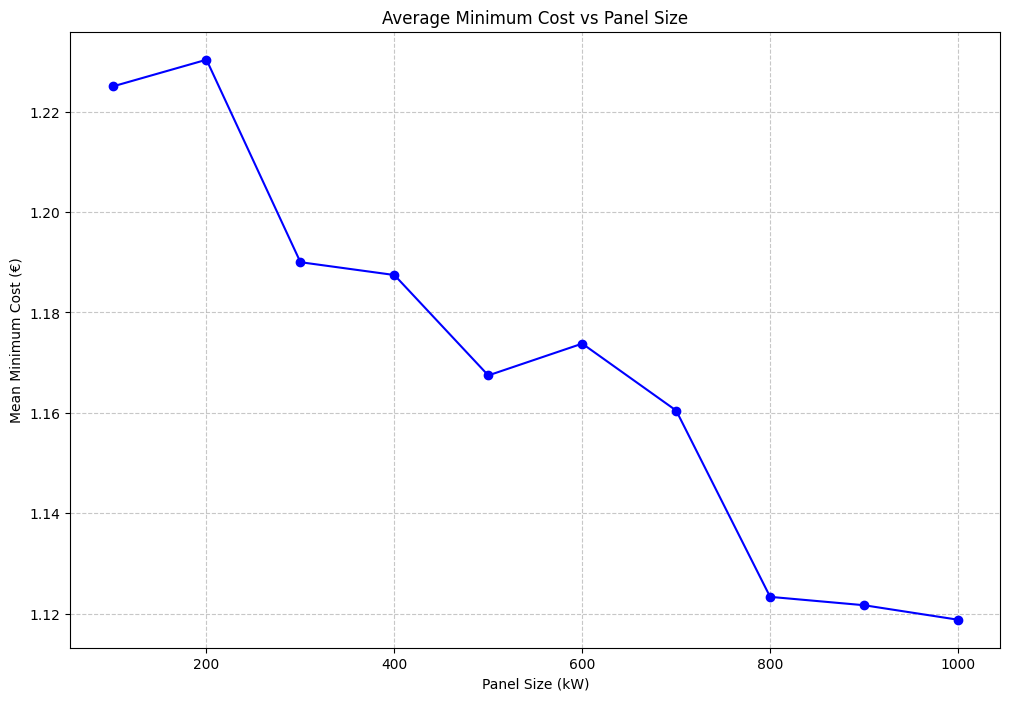

In [17]:
# Create a dictionary to store all costs for each panel size
panel_size_costs = {}

# Iterate through data_dict to group costs by panel size
for key, value in data_dict.items():
    panel_size = int(key.split('_')[2][1:])  # Extract panel size from key
    if panel_size not in panel_size_costs:
        panel_size_costs[panel_size] = []
    panel_size_costs[panel_size].append(value[2])  # value[2] is the minimum cost

# Calculate mean cost for each panel size
mean_costs = {}
for ps, costs in panel_size_costs.items():
    mean_costs[ps] = np.mean(costs)

# Create lists for plotting
panel_sizes = sorted(mean_costs.keys())
mean_cost_values = [mean_costs[ps] for ps in panel_sizes]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(panel_sizes, mean_cost_values, 'b-o')
plt.xlabel('Panel Size (kW)')
plt.ylabel('Mean Minimum Cost (€)')
plt.title('Average Minimum Cost vs Panel Size')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

[ 100  200  300  400  500  600  700  800  900 1000]
[0.88, 0.86, 0.85, 0.83, 0.81, 0.79, 0.77, 0.75, 0.74, 0.72]


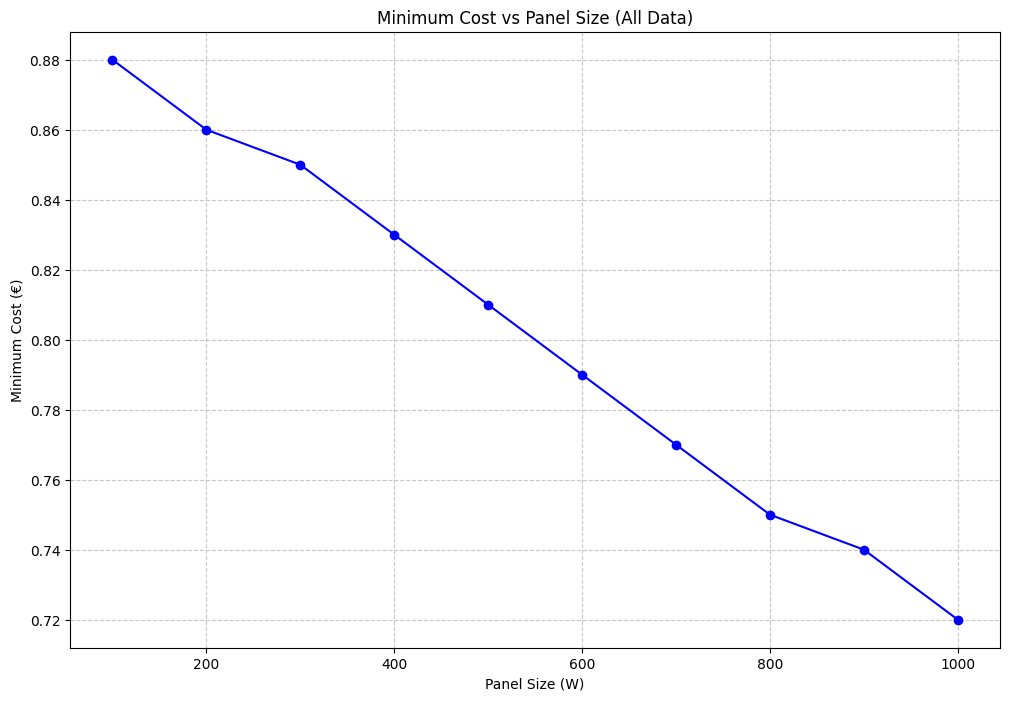

In [18]:
# Get minimum cost for each pv panel size from all data
panel_sizes = np.arange(100, 1001, 100)  # range of panel size values
print(panel_sizes)
minimum_cost_all = []

for ps in panel_sizes:
    # print(ps)
    min_cost_cur_panel = []
    for k, v in data_dict.items():
        # print(k)
        panel_size = int(k.split('_')[2][1:])  # Extract panel size from key
        if panel_size == ps:
            # print(v[2])
            min_cost_cur_panel.append(v[2])
    # print(min_cost_cur_panel)
    # Get the minimum cost for this panel size
    min_cost = min(min_cost_cur_panel)
    minimum_cost_all.append(min_cost)

print(minimum_cost_all)
    
# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(panel_sizes, minimum_cost_all, 'b-o')
plt.xlabel('Panel Size (W)')
plt.ylabel('Minimum Cost (€)')
plt.title('Minimum Cost vs Panel Size (All Data)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Conclusion

In [19]:
plt.style.use('seaborn-v0_8-paper')
# Set all fonts to serif
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # Specify Times New Roman as the serif font
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25 
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

In [20]:
# # Plot 1: Duration vs Minimum Cost
# plt.figure(figsize=(16, 10), dpi=300)
# duration = np.arange(14, 29)  # range of duration values
# minimum_cost_duration = []
# for d in duration:
#     costs = [v[2] for k, v in data_dict.items() if f'd{d}_' in k]
#     min_cost = min(costs)
#     minimum_cost_duration.append(min_cost)

# plt.plot(duration, minimum_cost_duration, 'b-o')
# plt.xlabel('Duration (days)', fontsize=25, fontweight='bold')
# plt.ylabel('Minimum Cost (€)', fontsize=25, fontweight='bold')
# plt.title('Duration Effect on Minimum Cost', fontsize=25, fontweight='bold')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig('duration_vs_cost.pdf', bbox_inches='tight')
# plt.show()

# # Plot 2: Start Hour vs Minimum Cost
# plt.figure(figsize=(16, 10), dpi=300)
# start_hour = np.arange(0, 24, 4)  # range of start hour values
# minimum_cost_hour = []
# for sh in start_hour:
#     costs = [v[2] for k, v in data_dict.items() if f's{sh}_' in k]
#     min_cost = min(costs)
#     minimum_cost_hour.append(min_cost)

# plt.plot(start_hour, minimum_cost_hour, 'r-o')
# plt.xlabel('Start Hour', fontsize=25, fontweight='bold')
# plt.ylabel('Minimum Cost (€)', fontsize=25, fontweight='bold')
# plt.title('Start Hour Effect on Minimum Cost', fontsize=25, fontweight='bold')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig('start_hour_vs_cost.pdf', bbox_inches='tight')
# plt.show()

# # Plot 3: Panel Size vs Minimum Cost
# plt.figure(figsize=(16, 10), dpi=300)
# panel_sizes = np.arange(100, 1001, 100)  # range of panel size values
# minimum_cost_panel = []
# for ps in panel_sizes:
#     min_cost_cur_panel = []
#     for k, v in data_dict.items():
#         panel_size = int(k.split('_')[2][1:])  # Extract panel size from key
#         if panel_size == ps:
#             min_cost_cur_panel.append(v[2])
#     min_cost = min(min_cost_cur_panel)
#     minimum_cost_panel.append(min_cost)

# plt.plot(panel_sizes, minimum_cost_panel, 'g-o')
# plt.xlabel('Panel Size (W)', fontsize=25, fontweight='bold')
# plt.ylabel('Minimum Cost (€)', fontsize=25, fontweight='bold')
# plt.title('Panel Size Effect on Minimum Cost', fontsize=25, fontweight='bold')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig('panel_size_vs_cost.pdf', bbox_inches='tight')
# plt.show()


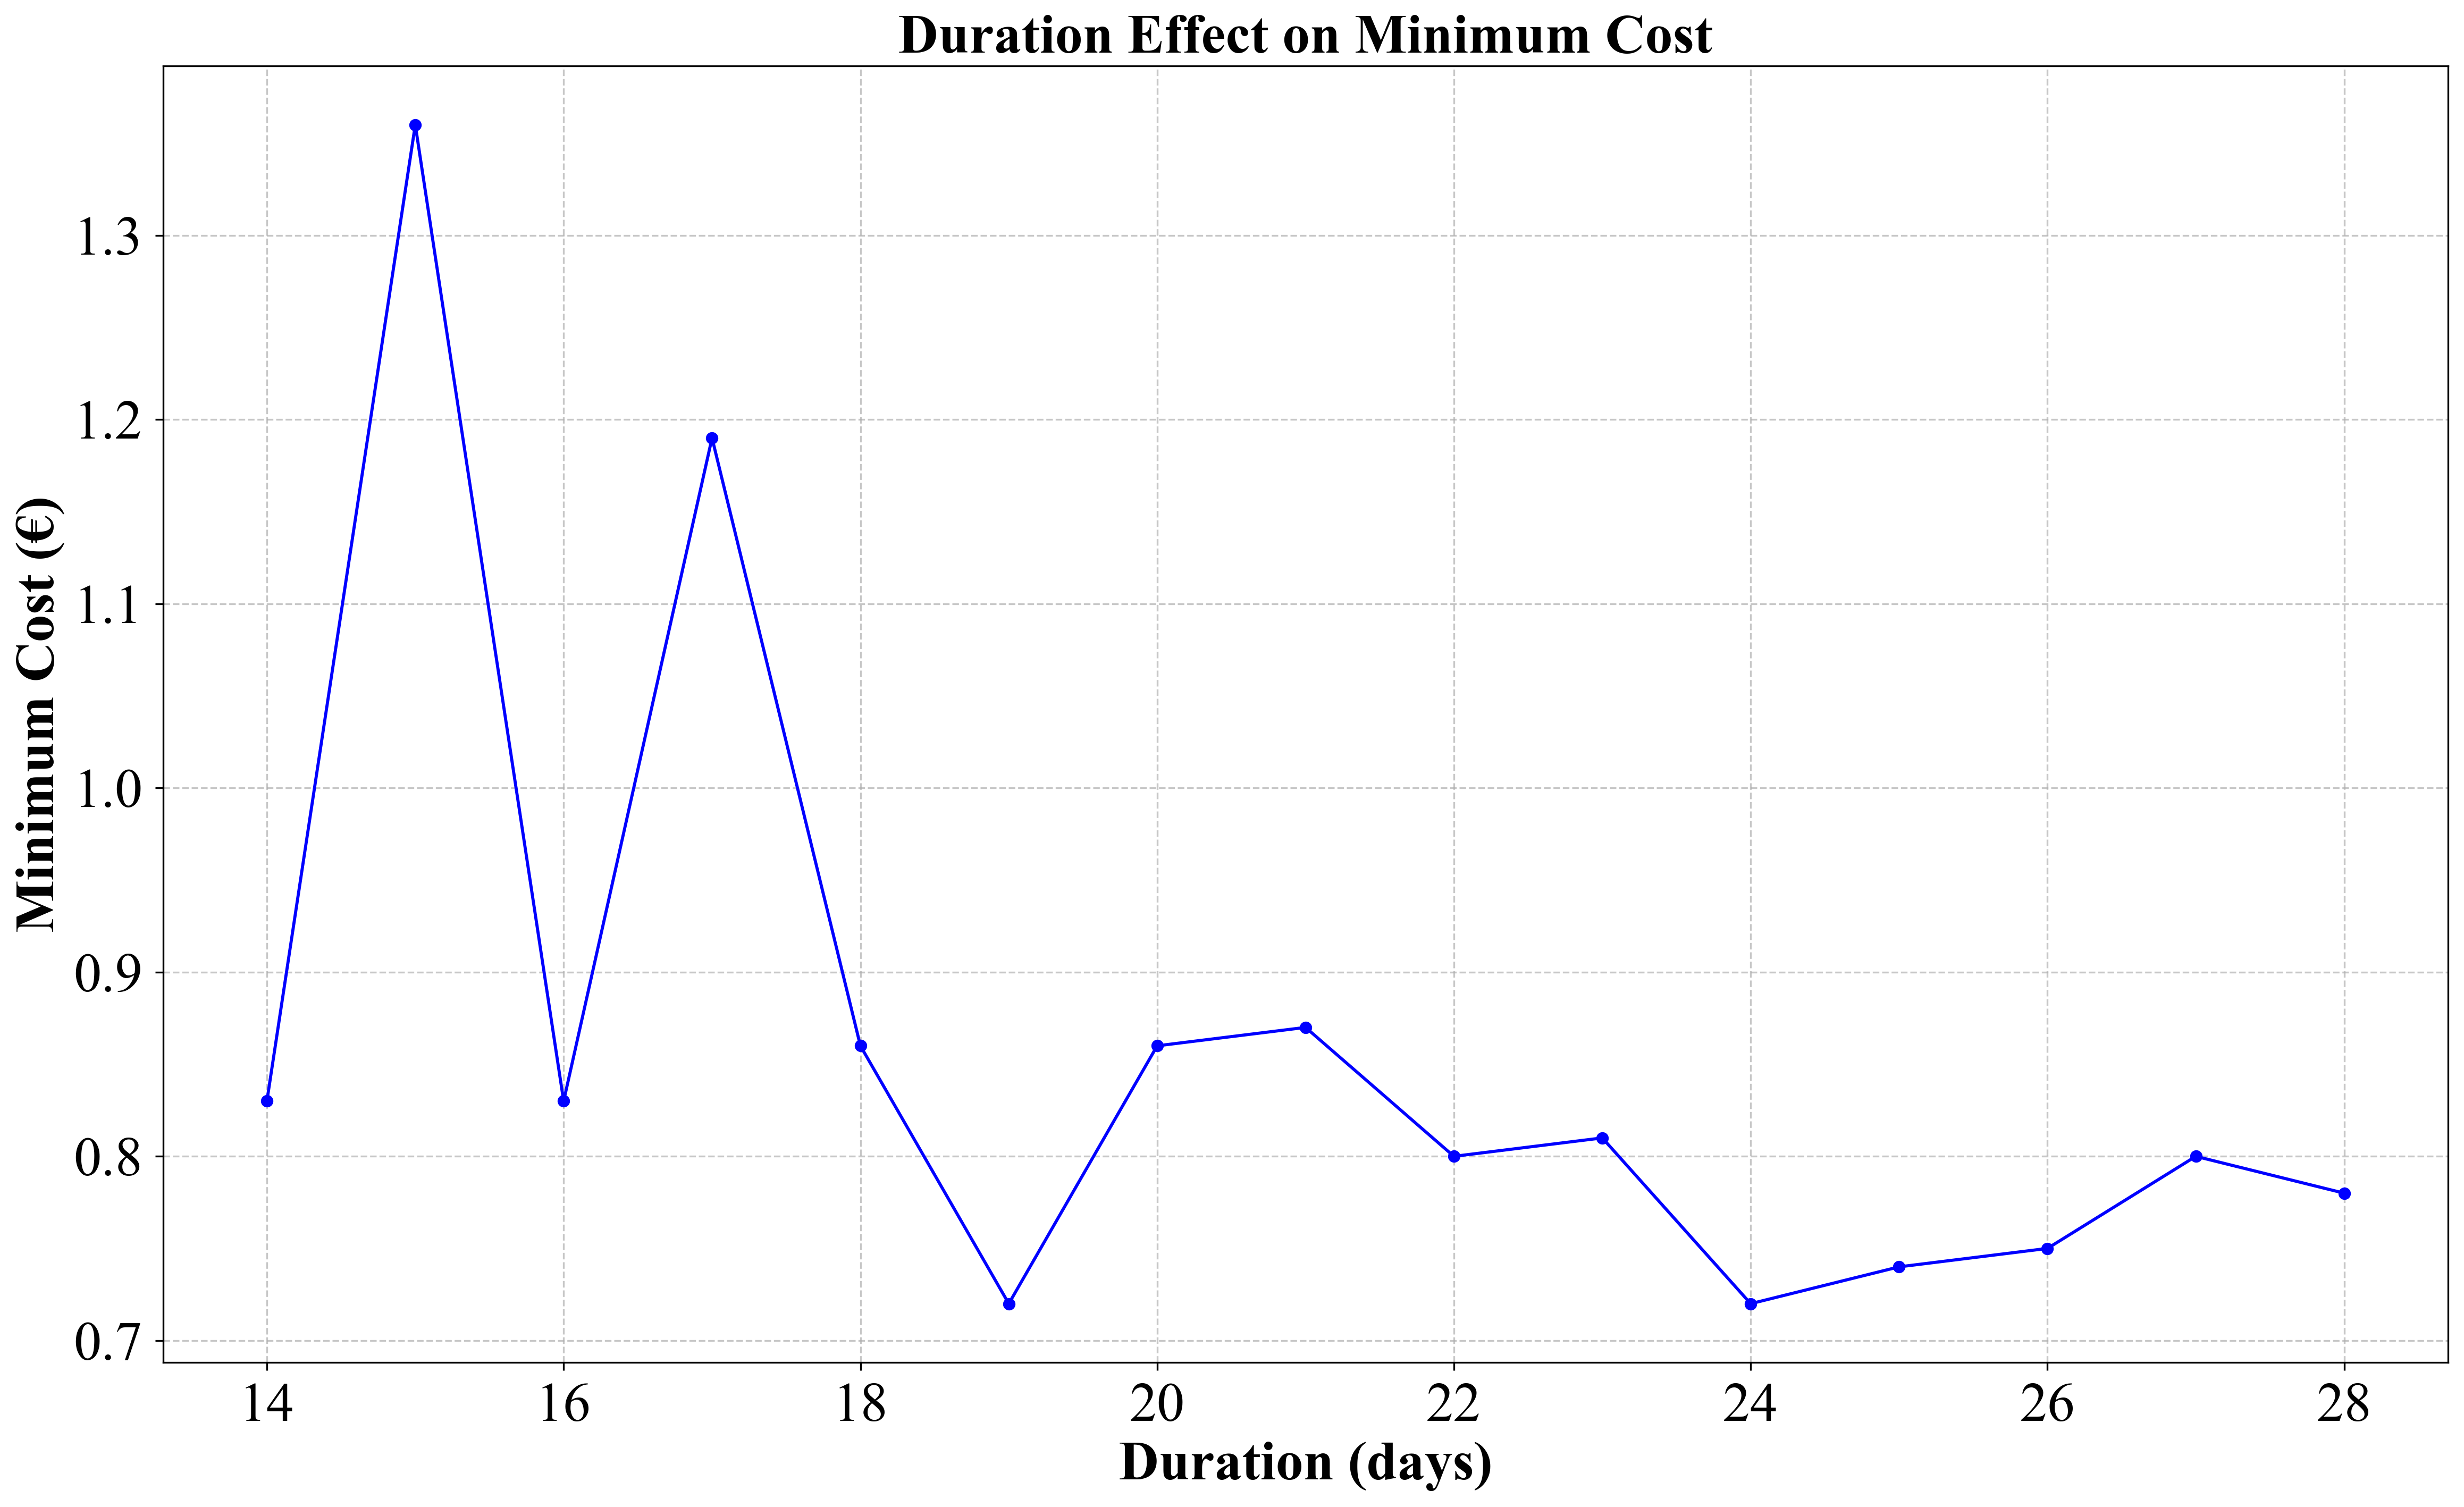

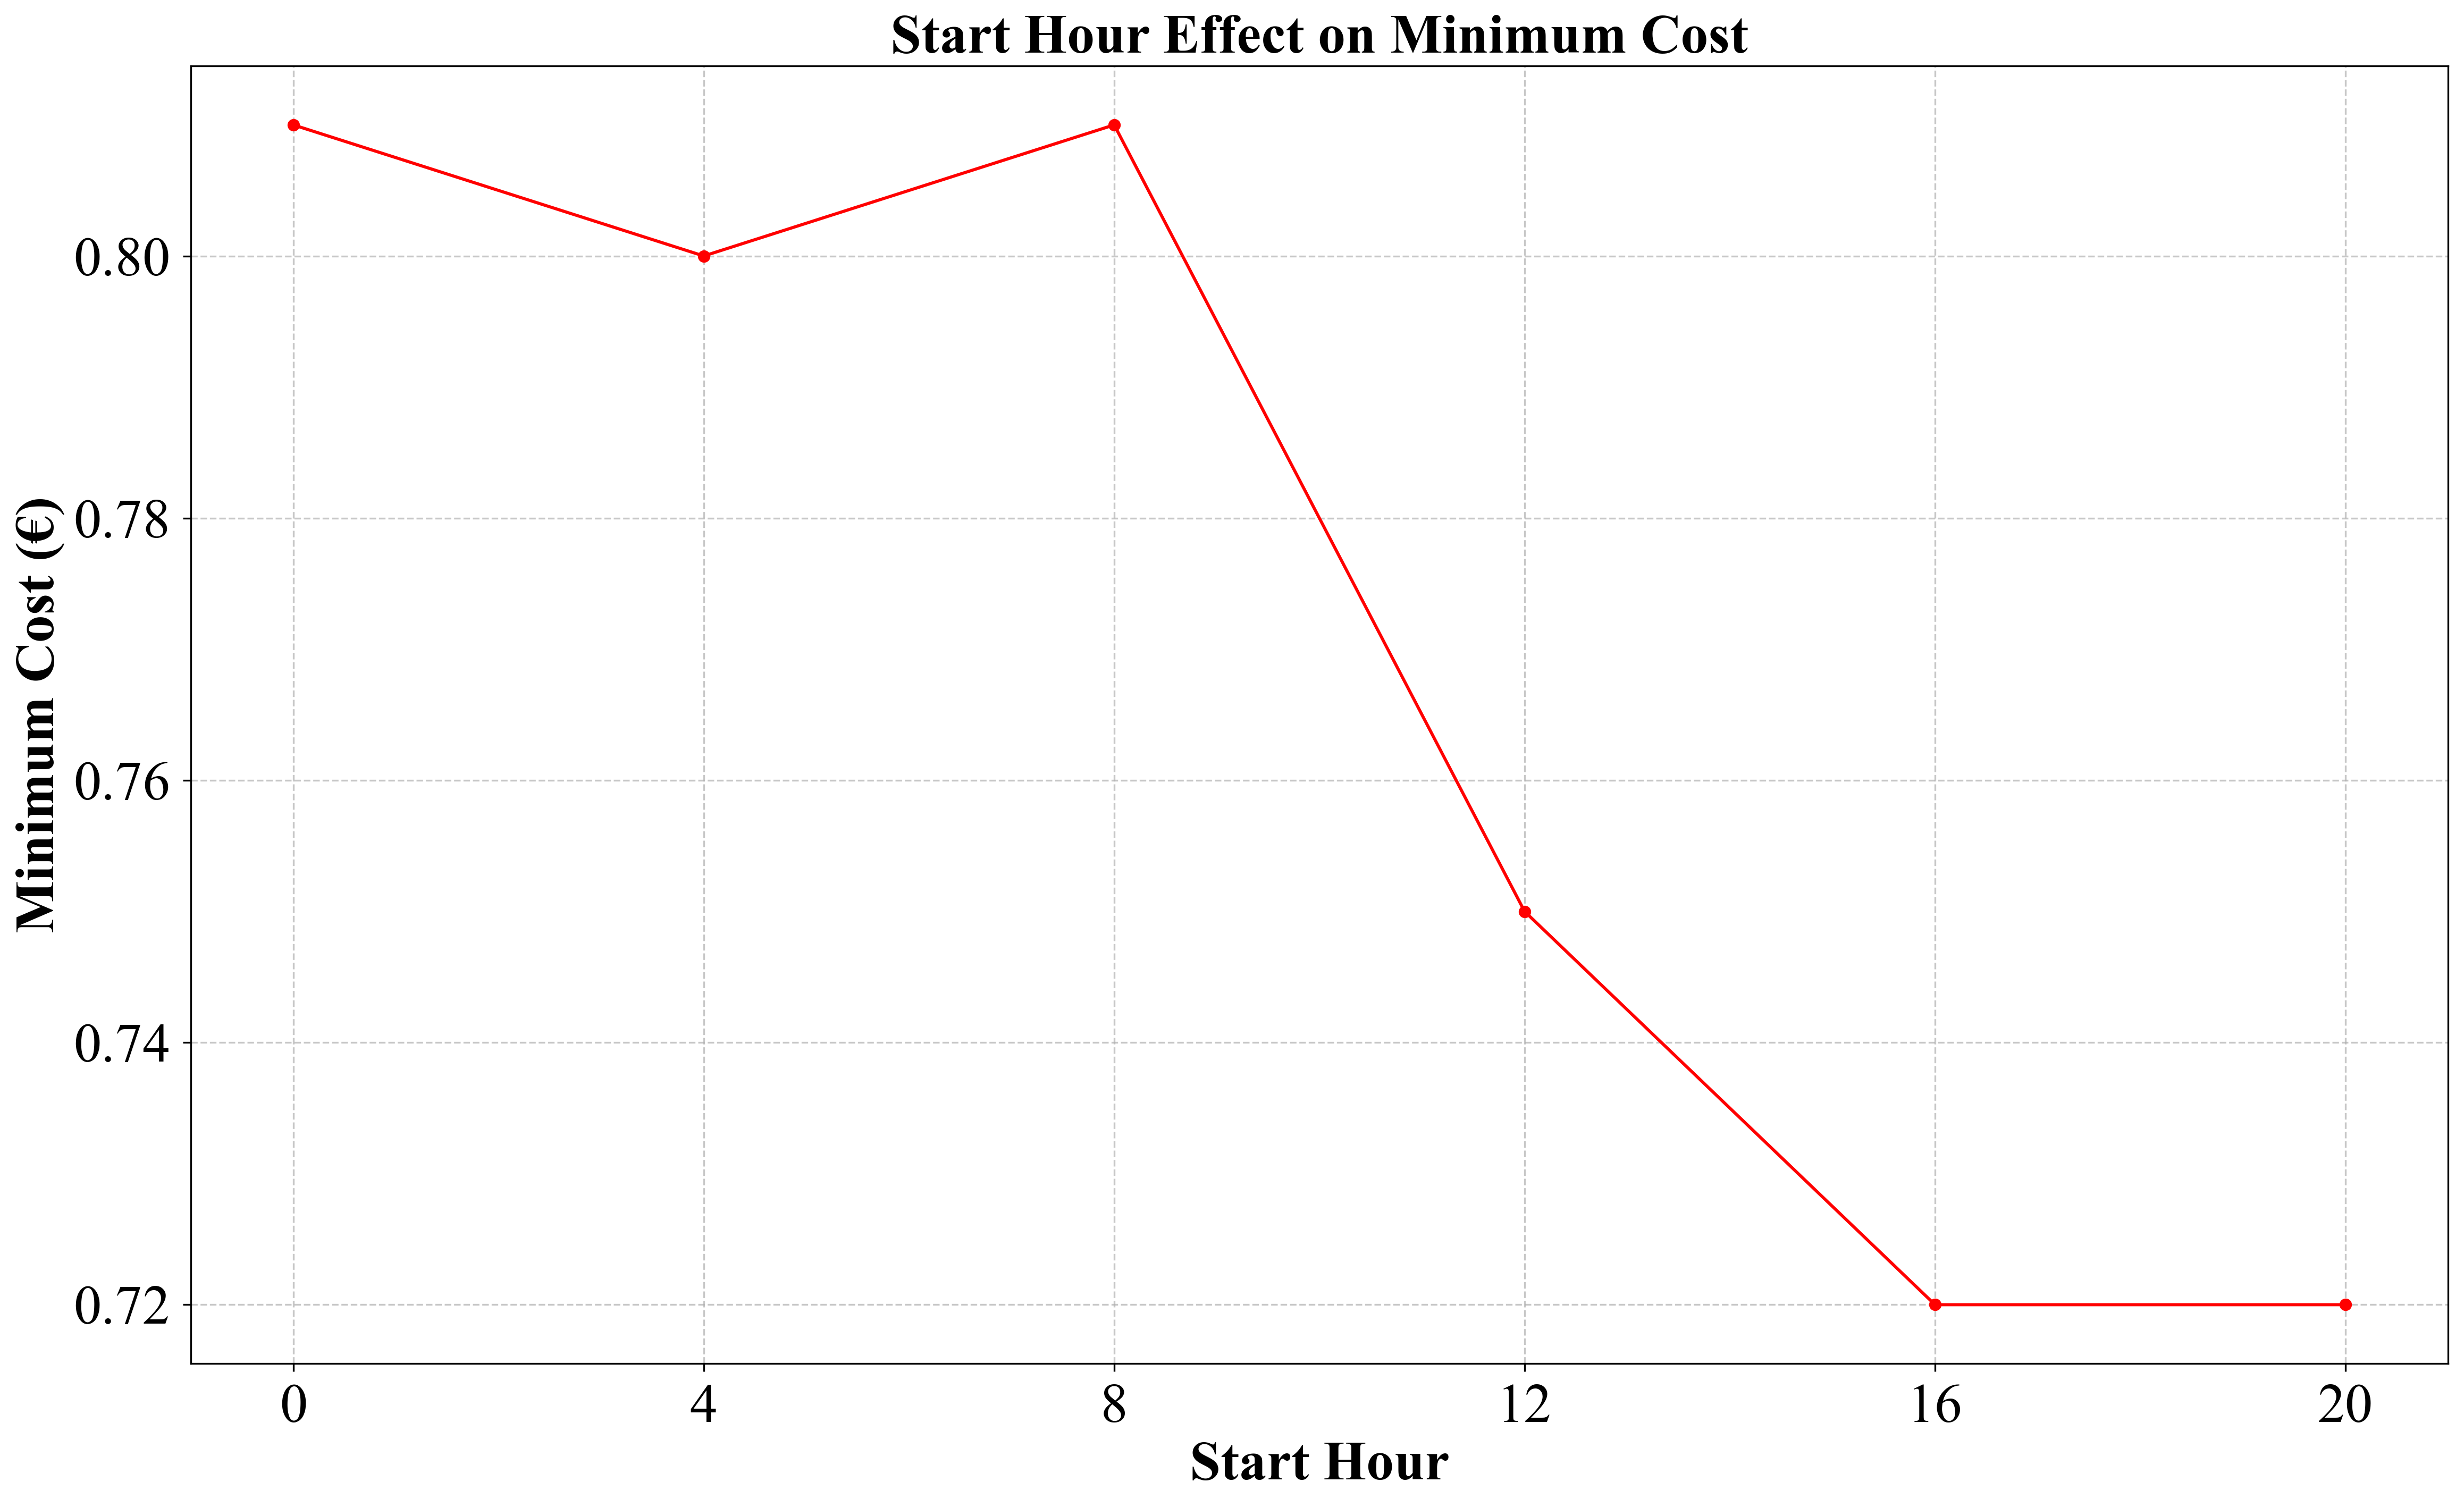

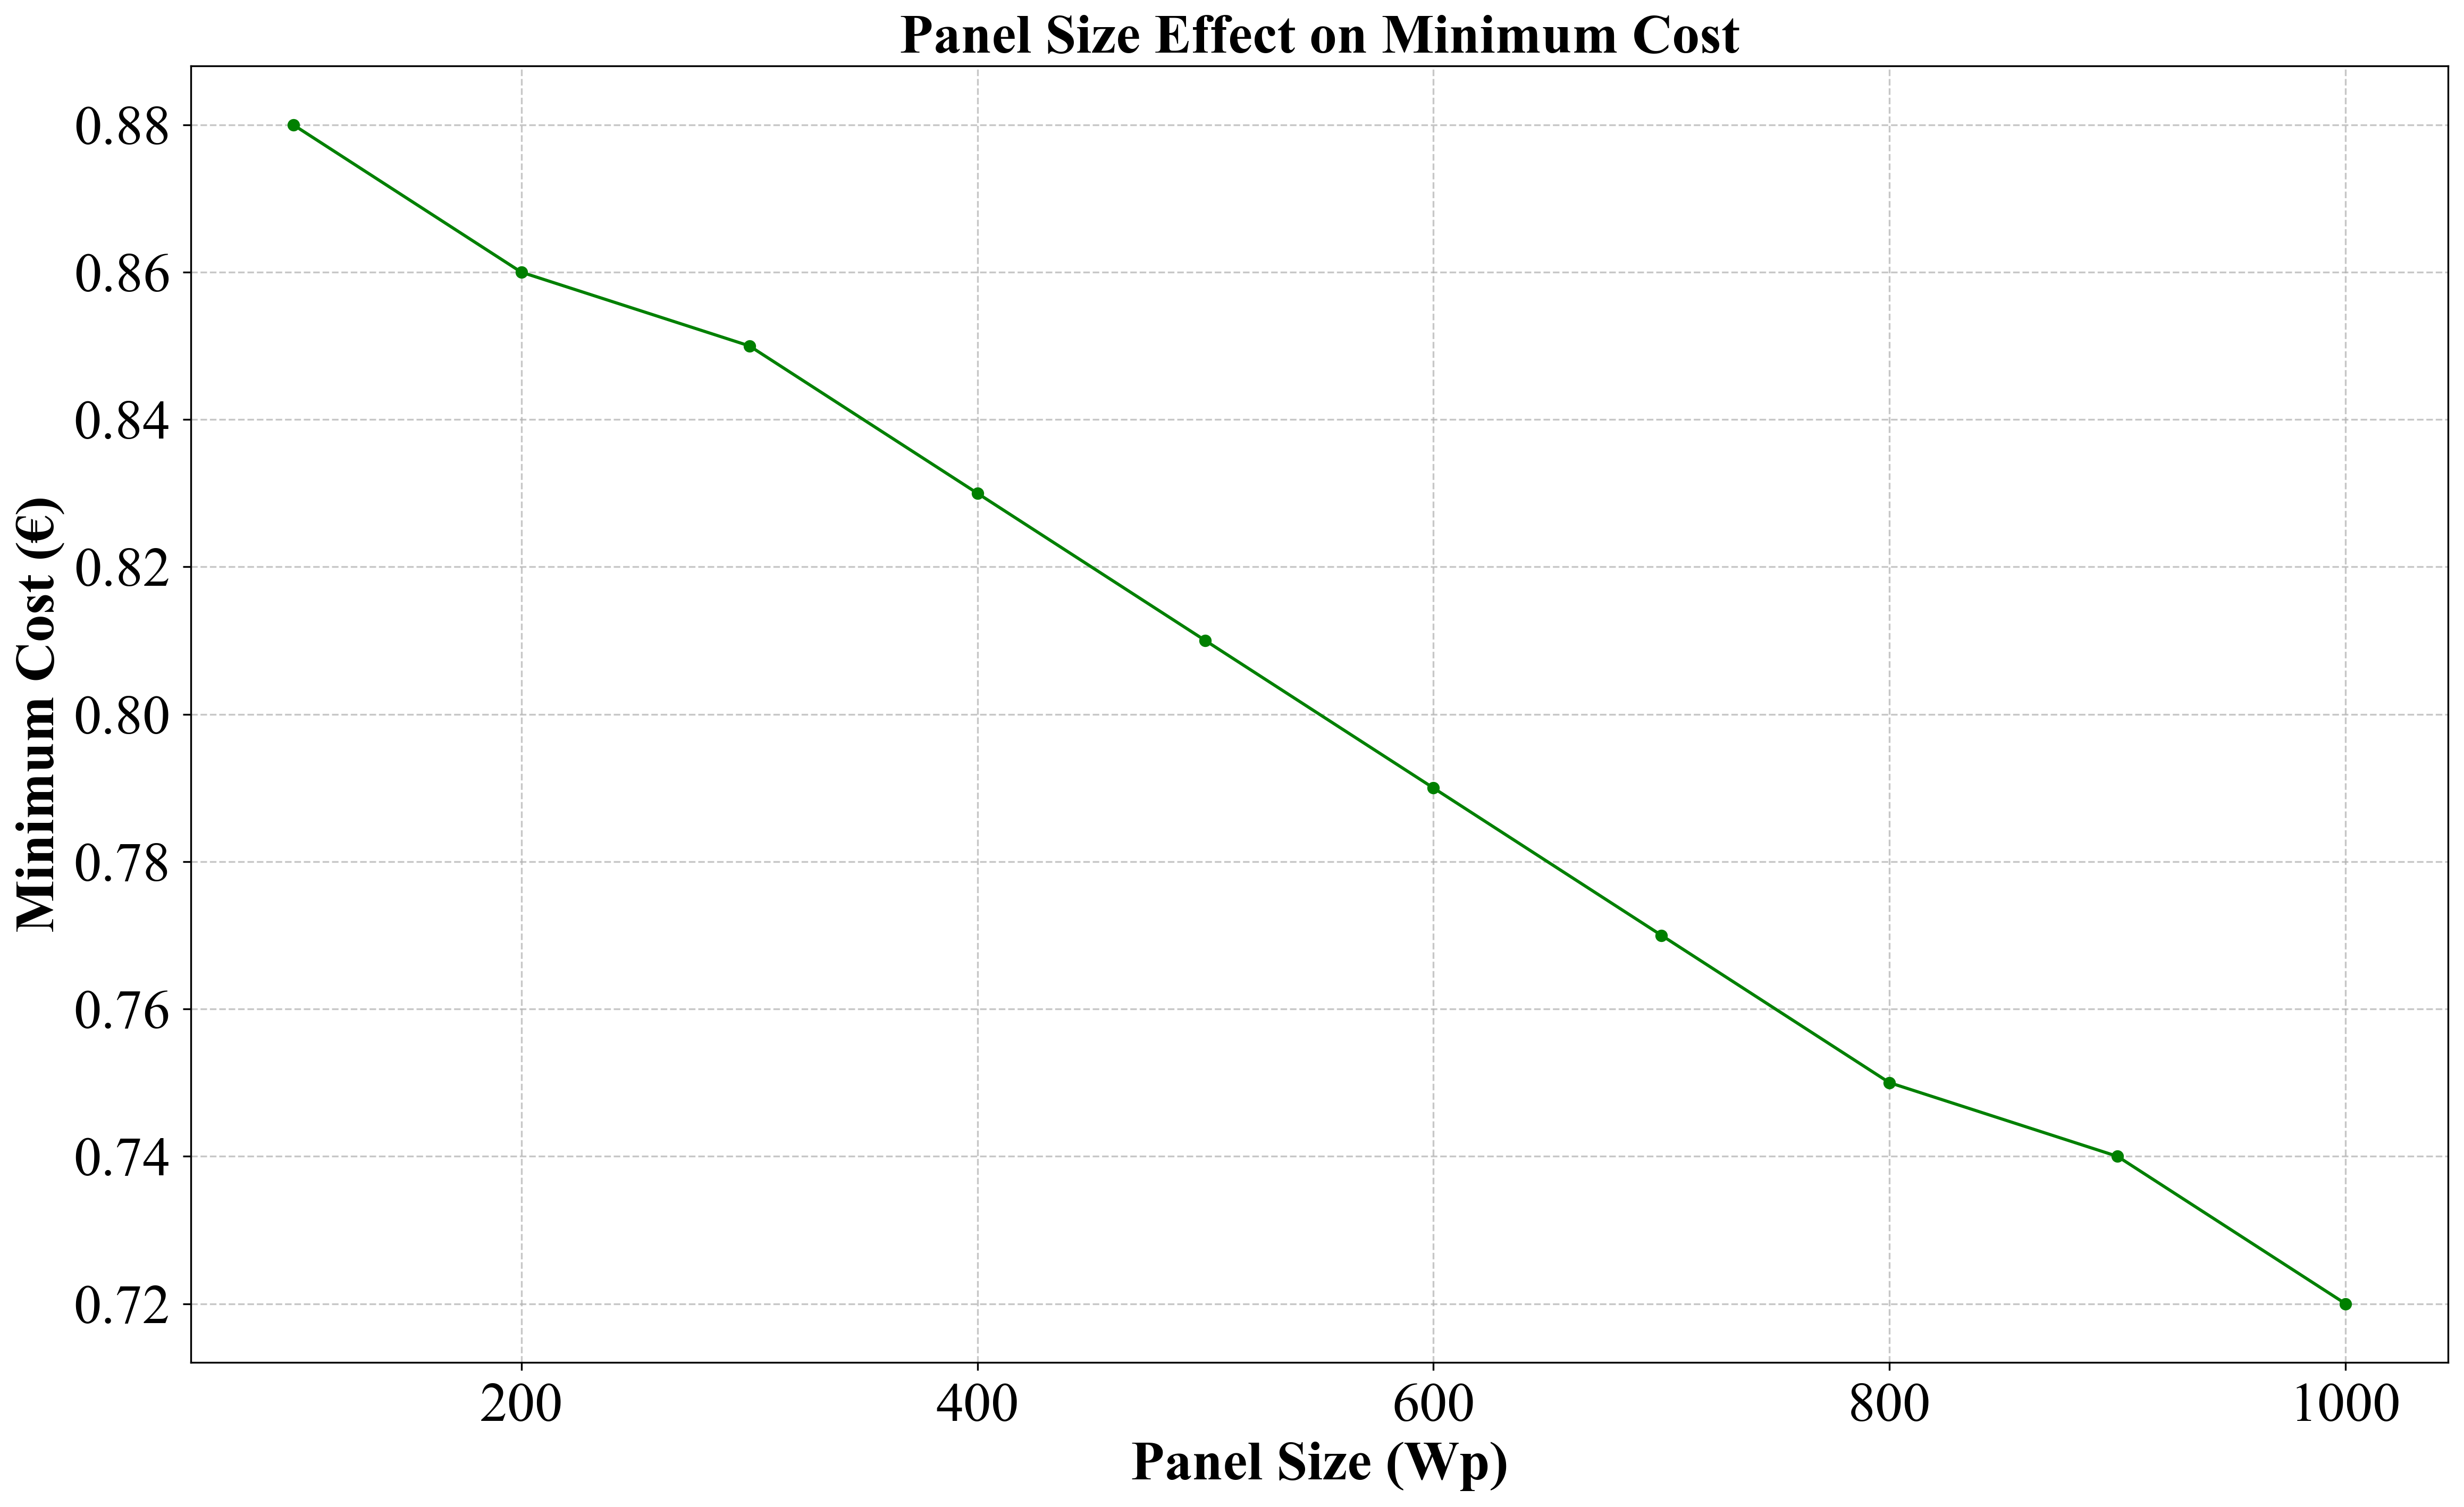

In [21]:
# Plot 1: Duration vs Minimum Cost
plt.figure(figsize=(16, 10), dpi=300)
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
duration = np.arange(14, 29)  # range of duration values
minimum_cost_duration = []
for d in duration:
    costs = [v[2] for k, v in data_dict.items() if f'd{d}_' in k]
    min_cost = min(costs)
    minimum_cost_duration.append(min_cost)

plt.plot(duration, minimum_cost_duration, 'b-o')
plt.xlabel('Duration (days)', fontsize=25, fontweight='bold')
plt.ylabel('Minimum Cost (€)', fontsize=25, fontweight='bold')
plt.title('Duration Effect on Minimum Cost', fontsize=25, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('duration_vs_cost.pdf', bbox_inches='tight')
plt.show()

# Plot 2: Start Hour vs Minimum Cost
plt.figure(figsize=(16, 10), dpi=300)
start_hour = np.arange(0, 24, 4)  # range of start hour values
minimum_cost_hour = []
for sh in start_hour:
    costs = [v[2] for k, v in data_dict.items() if f's{sh}_' in k]
    min_cost = min(costs)
    minimum_cost_hour.append(min_cost)

plt.plot(start_hour, minimum_cost_hour, 'r-o')
plt.xlabel('Start Hour', fontsize=25, fontweight='bold')
plt.ylabel('Minimum Cost (€)', fontsize=25, fontweight='bold')
plt.title('Start Hour Effect on Minimum Cost', fontsize=25, fontweight='bold')
plt.xticks(start_hour)  # Show only integer values on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('start_hour_vs_cost.pdf', bbox_inches='tight')
plt.show()

# Plot 3: Panel Size vs Minimum Cost
plt.figure(figsize=(16, 10), dpi=300)
panel_sizes = np.arange(100, 1001, 100)  # range of panel size values
minimum_cost_panel = []
for ps in panel_sizes:
    min_cost_cur_panel = []
    for k, v in data_dict.items():
        panel_size = int(k.split('_')[2][1:])  # Extract panel size from key
        if panel_size == ps:
            min_cost_cur_panel.append(v[2])
    min_cost = min(min_cost_cur_panel)
    minimum_cost_panel.append(min_cost)

plt.plot(panel_sizes, minimum_cost_panel, 'g-o')
plt.xlabel('Panel Size (Wp)', fontsize=25, fontweight='bold')
plt.ylabel('Minimum Cost (€)', fontsize=25, fontweight='bold')
plt.title('Panel Size Effect on Minimum Cost', fontsize=25, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('panel_size_vs_cost.pdf', bbox_inches='tight')
plt.show()
